In [1]:
!pip install transformers

In [2]:
import pandas as pd
# from transformers import pipeline

import torch
from torch.utils.data import DataLoader

from transformers import MBartForConditionalGeneration, MBartTokenizer, AdamW

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
cd "./gdrive/My Drive/Colab Notebooks/CNI"

/content/gdrive/My Drive/Colab Notebooks/CNI


In [5]:
!ls

'2020 with Translation.csv'
 finetuned_fr_en_model
 finetuned_zh_en_model
 neural-machine-translation-with-python.ipynb
 small_vocab_en.txt
 small_vocab_fr.txt
'Transfer Learning for Machine Translation.ipynb'


In [6]:
data = pd.read_csv("./2020 with Translation.csv", header=0)

In [7]:
data = data.drop(columns="index")

In [8]:
data.head()

,Language,Review,Translation
0,fr,Positif: L'espace dans l'appartement. La situa...,Positive: The space in the apartment. The geog...
1,zh,服務一般，有親子設施還是不錯的,"Service is average, it is good to have parent-..."
2,zh,酒店性价比不错，健身房游泳池儿童游乐设施都齐全，泳池够大也有供儿童戏水的婴幼儿池.楼下有全家...,The hotel is cost-effective. The gym swimming ...
3,zh,这公寓酒店很好，在这疫情里，价格非常优惠，可以推荐给大家。一厅一房很舒适，环境也不错，机器人...,This apartment hotel is very good. In this epi...
4,zh,服务一般，有亲子设施还是不错的,"Service is average, it is good to have parent-..."


In [9]:
data[data["Language"] == 'zh']["Review"][1]

'服務一般，有親子設施還是不錯的'

In [10]:
data[data["Language"] == 'zh']["Translation"][1]

'Service is average, it is good to have parent-child facilities'

In [11]:
# from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

# tokenizer = AutoTokenizer.from_pretrained("facebook/mbart-large-cc25")
# model = AutoModelForSeq2SeqLM.from_pretrained("facebook/mbart-large-cc25")

In [12]:
# #article = "UN Chief Says There Is No Military Solution in Syria"

# article = "服務一般，有親子設施還是不錯的"

# batch = tokenizer.prepare_seq2seq_batch(src_texts=[article], src_lang="zh_CN")
# translated_tokens = model.generate(**batch, decoder_start_token_id=tokenizer.lang_code_to_id["en_XX"])
# translation = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
# #assert translation == "Şeful ONU declară că nu există o soluţie militară în Siria"

In [13]:
# translation

In [14]:
# from transformers import MBartForConditionalGeneration, MBartTokenizer
# model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-en-ro")
# tokenizer = MBartTokenizer.from_pretrained("facebook/mbart-large-en-ro")
# article = "UN Chief Says There Is No Military Solution in Syria"
# batch = tokenizer.prepare_seq2seq_batch(src_texts=[article], src_lang="en_XX")
# translated_tokens = model.generate(**batch, decoder_start_token_id=tokenizer.lang_code_to_id["ro_RO"])
# translation = tokenizer.batch_decode(translated_tokens, skip_special_tokens=True)[0]
# assert translation == "Şeful ONU declară că nu există o soluţie militară în Siria"

In [15]:
# example_chinese_phrase = "服務一般，有親子設施還是不錯的"
# expected_translation_english = "Service is average, it is good to have parent-child facilities"

In [16]:
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-cc25")
tokenizer = MBartTokenizer.from_pretrained("facebook/mbart-large-cc25")

In [17]:
example_chinese_phrase = data[data["Language"] == 'zh']["Review"].tolist()
expected_translation_english = data[data["Language"] == 'zh']["Translation"].tolist()

In [18]:
epochs = 1
batch_size = 2
len(example_chinese_phrase)

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
optim = AdamW(model.parameters(), lr=5e-5)
model.to(device)
model.train()

#loss_list = []
#epoch_no_list = []

for epoch in range(epochs):
    epoch_loss = 0.0
    running_loss = 0.0
    k=0
    for i in range(0, 100, batch_size):
        print(i, i+batch_size-1)
        example_chinese_phrase_t = example_chinese_phrase[i:i+batch_size-1]
        expected_translation_english_t = expected_translation_english[i:i+batch_size-1]
        batch = tokenizer.prepare_seq2seq_batch(example_chinese_phrase_t, src_lang="zh_CN", tgt_lang="en_XX", tgt_texts=expected_translation_english_t)

        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        #decoder_input_ids = target_ids[:, :-1].contiguous()
        #labels = target_ids[:, 1:].clone()

        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels) #forward
        loss = outputs[0]
        loss.backward()
        optim.step()

        #epoch_loss += outputs.shape[0] * outputs[0].item()

        # print statistics
        running_loss += loss.item()
        if k % 10:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, k + 1, running_loss))
            #loss_list.append(running_loss)
            #epoch_no_list.append(epoch)
            running_loss = 0.0

        del example_chinese_phrase_t
        del expected_translation_english_t
        del batch
        del input_ids
        del attention_mask
        del labels

        del loss
        k += 1

        

0 1


/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


2 3
[1,     2] loss: 22.535
4 5
[1,     3] loss: 3.833
6 7
[1,     4] loss: 5.687
8 9
[1,     5] loss: 3.239
10 11
[1,     6] loss: 4.087
12 13
[1,     7] loss: 3.752
14 15
[1,     8] loss: 2.694
16 17
[1,     9] loss: 4.863
18 19
[1,    10] loss: 4.117
20 21
22 23
[1,    12] loss: 6.996
24 25
[1,    13] loss: 6.465
26 27
[1,    14] loss: 5.819
28 29
[1,    15] loss: 3.607
30 31
[1,    16] loss: 3.623
32 33
[1,    17] loss: 3.045
34 35
[1,    18] loss: 2.531
36 37
[1,    19] loss: 4.679
38 39
[1,    20] loss: 4.043
40 41
42 43
[1,    22] loss: 6.810
44 45
[1,    23] loss: 2.942
46 47
[1,    24] loss: 3.278
48 49
[1,    25] loss: 3.697
50 51
[1,    26] loss: 3.468
52 53
[1,    27] loss: 3.553
54 55
[1,    28] loss: 3.791
56 57
[1,    29] loss: 2.934
58 59
[1,    30] loss: 3.261
60 61
62 63
[1,    32] loss: 3.600
64 65
[1,    33] loss: 3.550
66 67
[1,    34] loss: 3.230
68 69
[1,    35] loss: 4.402
70 71
[1,    36] loss: 4.009
72 73
[1,    37] loss: 2.834
74 75
[1,    38] loss: 3.111
76 

In [ ]:
src_text = data[data["Language"] == 'zh']["Review"].tolist()[0:10]

model.to("cpu")

translated = model.generate(**tokenizer.prepare_seq2seq_batch(src_text))
tgt_text = [tokenizer.decode(t, skip_special_tokens=True) for t in translated]

/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:1374: FutureWarning: The `max_len` attribute has been deprecated and will be removed in a future version, use `model_max_length` instead.
  FutureWarning,


In [ ]:
tgt_text

In [ ]:
data[data["Language"] == 'zh']["Translation"].tolist()[0:10]

In [ ]:
model.save_pretrained('./finetuned_zh_en_model_mbart/')
tokenizer.save_pretrained('./finetuned_zh_en_model_mbart/')

In [ ]:
del model
del tokenizer

In [ ]:
##########################################################################################################################################

In [15]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_zh = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-zh-en")
tokenizer_zh = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-zh-en")

In [16]:
# type(model)

In [17]:
src_text = data[data["Language"] == 'zh']["Review"].tolist()[0:30]

model_zh.to("cpu")

translated = model_zh.generate(**tokenizer_zh.prepare_seq2seq_batch(src_text))
tgt_text = [tokenizer_zh.decode(t, skip_special_tokens=True) for t in translated]

In [18]:
tgt_text

["It's just a service. It's nice to have a family.",
 "The hotel price is good, the gym pool is full, the pool is big enough for children and the pool for children. There's a family convenience store downstairs, a commercial square, a few hundred metres on foot and a subway station, two stations off the Golden Chicken Lake subway, free parking in the underground parking lot, convenient for parents and for business trips. The basics for breakfast are not much, but it would be better if they were enriched.",
 "This is a very good apartment. In this case, the price is very favourable, and you can recommend it. One room is comfortable, and the environment is nice, robotics are nice, and breakfast is fine. Next time we go to Suzhou, we'll order this hotel again!",
 "It's a regular service. It's nice to have a parent-child facility.",
 'This is a very nice apartment. In this case, the price is very generous and can be recommended. The room is comfortable, the environment is good, the robots 

In [19]:
data[data["Language"] == 'zh']["Translation"].tolist()[0:30]

['Service is average, it is good to have parent-child facilities',
 'The hotel is cost-effective. The gym swimming pool and children’s play facilities are complete. The swimming pool is big enough and there is a baby pool for children to play in the water. There is a family convenience store downstairs, opposite the commercial plaza, and Baoyan is next to it. There is a subway station a few hundred meters away. , Two subway stations away from Jinji Lake, free parking in the underground parking lot, very convenient, suitable for parents and children, but also suitable for business travel. There are basic types of breakfast, but not too many. It would be better if they were richer.',
 'This apartment hotel is very good. In this epidemic, the price is very favorable and I can recommend it to everyone. One living room and one bedroom are very comfortable, the environment is also good, the robots are attentive service, breakfast is also OK, next time I go to Suzhou, I will definitely book t

In [20]:
example_chinese_phrase_zh = data[data["Language"] == 'zh']["Review"].tolist()
expected_translation_english_zh = data[data["Language"] == 'zh']["Translation"].tolist()

In [21]:
epochs = 3
batch_size = 10

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
optim = AdamW(model_zh.parameters(), lr=5e-5)
model_zh.to(device)
model_zh.train()


loss_list = []
epoch_no_list = []

for epoch in range(epochs):
    epoch_loss = 0.0
    running_loss = 0.0
    k=0
    for i in range(0, len(example_chinese_phrase_zh), batch_size):
        print(i, i+batch_size-1)
        example_chinese_phrase_t = example_chinese_phrase_zh[i:i+batch_size-1]
        expected_translation_english_t = expected_translation_english_zh[i:i+batch_size-1]
        batch = tokenizer_zh.prepare_seq2seq_batch(example_chinese_phrase_t, tgt_texts=expected_translation_english_t)

        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_zh(input_ids=input_ids, attention_mask=attention_mask, labels=labels) #forward
        loss = outputs[0]
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        if k % 10:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, k + 1, running_loss))
            loss_list.append(running_loss)
            epoch_no_list.append(epoch)
            running_loss = 0.0

        k += 1

        del example_chinese_phrase_t
        del expected_translation_english_t
        del batch
        del input_ids
        del attention_mask
        del labels

        del loss

0 9
10 19
[1,     2] loss: 10.024
20 29
[1,     3] loss: 2.053
30 39
[1,     4] loss: 1.434
40 49
[1,     5] loss: 0.871
50 59
[1,     6] loss: 1.281
60 69
[1,     7] loss: 1.223
70 79
[1,     8] loss: 1.346
80 89
[1,     9] loss: 0.965
90 99
[1,    10] loss: 1.330
100 109
110 119
[1,    12] loss: 2.425
120 129
[1,    13] loss: 0.852
130 139
[1,    14] loss: 1.199
140 149
[1,    15] loss: 0.898
150 159
[1,    16] loss: 1.065
160 169
[1,    17] loss: 0.553
170 179
[1,    18] loss: 0.862
180 189
[1,    19] loss: 1.302
190 199
[1,    20] loss: 1.091
200 209
210 219
[1,    22] loss: 2.082
220 229
[1,    23] loss: 0.628
230 239
[1,    24] loss: 0.528
240 249
[1,    25] loss: 1.657
250 259
[1,    26] loss: 0.625
260 269
[1,    27] loss: 0.736
270 279
[1,    28] loss: 0.621
280 289
[1,    29] loss: 0.481
290 299
[1,    30] loss: 0.664
300 309
310 319
[1,    32] loss: 2.059
320 329
[1,    33] loss: 0.667
330 339
[1,    34] loss: 1.225
340 349
[1,    35] loss: 0.876
350 359
[1,    36] loss: 1.0

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Loss')

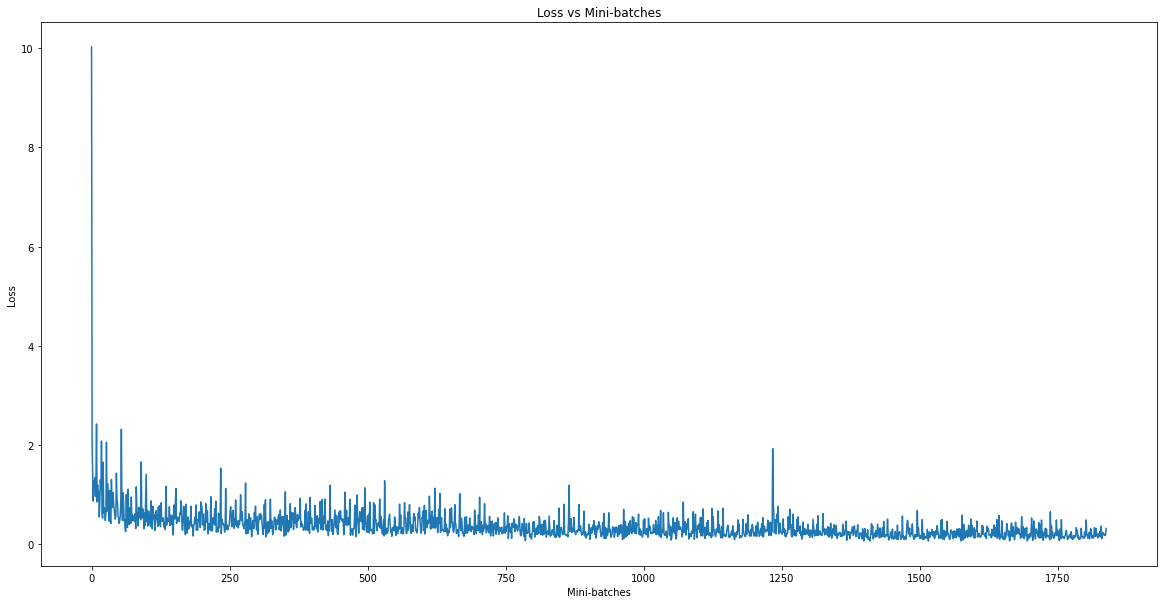

In [40]:
plt.figure(figsize=(20,10))

plt.plot(list(range(len(loss_list))), loss_list)

plt.title("Loss vs Mini-batches")
plt.xlabel("Mini-batches")
plt.ylabel("Loss")

In [55]:
src_text = data[data["Language"] == 'zh']["Review"].tolist()[0:30]

model_zh.to("cpu")

translated = model_zh.generate(**tokenizer_zh.prepare_seq2seq_batch(src_text))
tgt_text = [tokenizer_zh.decode(t, skip_special_tokens=True) for t in translated]

In [56]:
src_text

['服務一般，有親子設施還是不錯的',
 '酒店性价比不错，健身房游泳池儿童游乐设施都齐全，泳池够大也有供儿童戏水的婴幼儿池.楼下有全家便利店，对面是商业广场，边上就是宝燕，步行几百米有地铁站，离金鸡湖两站地铁，地下停车场免费停车，都很方便，适合亲子，也适合商旅出差。早餐品种基本款都有但不算多，要是再丰富点会更好。',
 '这公寓酒店很好，在这疫情里，价格非常优惠，可以推荐给大家。一厅一房很舒适，环境也不错，机器人贴心服务，早餐也可以，下次再去苏州一定会再订这公寓酒店！',
 '服务一般，有亲子设施还是不错的',
 '這公寓酒店很好，在這疫情裏，價格非常優惠，可以推薦給大家。一廳一房很舒適，環境也不錯，機器人貼心服務，早餐也可以，下次再去蘇州一定會再訂這公寓酒店！',
 '酒店性價比不錯，健身房游泳池小童遊樂設施都齊全，泳池夠大也有供小童戲水的嬰幼兒池.樓下有全家便利店，對麪是商業廣場，邊上就是寶燕，步行幾百米有地鐵站，離金雞湖兩站地鐵，地下停車場免費停車，都很方便，適合親子，也適合商旅出差。早餐品種基本款都有但不算多，要是再豐富點會更好。',
 '服务一流。啥都好 就是没浴袍',
 '酒店性价比高，前台接待热情，有要求及时解决，房间面积大，早餐也丰盛，不愧为全国连锁酒店。',
 '酒店性價比高，前台接待熱情，有要求及時解決，房間麪積大，早餐也豐盛，不愧為全國連鎖酒店。',
 '安靜舒適，洗衣做飯都方便，服務態度好。',
 '乾淨舒適，廚具，冰箱和洗衣機都有，服務態度好。',
 '干净舒适，厨具，冰箱和洗衣机都有，服务态度好。',
 '安静舒适，洗衣做饭都方便，服务态度好。',
 '地理位置很好，早餐也不錯，跟女朋友第一次出去玩，體驗感很nice',
 '地理位置很好，早餐也不错，跟女朋友第一次出去玩，体验感很nice',
 '位置不错，周边配套成熟，非常方便。因为出差几天想要找个地方洗衣服，套房带有洗衣机，还有洗衣粉很贴心。本来定的一卧室套房，免费升级了，客厅很大，适合一家人外出居住。',
 '非常不錯了，下次還去',
 '非常不错了，下次还去',
 '平常很難訂到，但是現在訪客人不多，空房蠻多，而且停車不方便，國內客人不一定接受，早餐可以。',
 '平常很難訂到，但是現在訪客人不多，空房蠻多，而且停車不方便，國內客人不一定接受，早餐可以。',
 '員工服務態度良

In [57]:
tgt_text

['Service is average, it is good to have parent-child facilities',
 ',,,,,,,,,,,,,',
 ',,,,,!',
 'Service is average, with parent-child facilities is good',
 ',,,,,,,,!',
 ',,,.,,,,,,,,,',
 'First-class service. Everything is good, but there is no bathrobe',
 ',,,,,,',
 ',,,,,,',
 'Quiet and comfortable, easy to wash and cook, good service attitude.',
 'Clean and comfortable, kitchenware, refrigerators and washing machines are available, and the service attitude is good.',
 'Clean and comfortable, there are kitchenware, refrigerators and washing machines, and good service attitude.',
 ',,',
 'The location is very good, the breakfast is also good, the first time out to play with my girlfriend, the experience is very nice',
 'The location is good, breakfast is also good, the first time out to play with my girlfriend, the experience is very nice',
 ',,,,,,,,',
 'Very good, go next time',
 'Very good, go next time',
 'It is usually difficult to book, but now there are not many visitors. Th

In [58]:
ans_text = data[data["Language"] == 'zh']["Translation"].tolist()[0:30]
ans_text

['Service is average, it is good to have parent-child facilities',
 'The hotel is cost-effective. The gym swimming pool and children’s play facilities are complete. The swimming pool is big enough and there is a baby pool for children to play in the water. There is a family convenience store downstairs, opposite the commercial plaza, and Baoyan is next to it. There is a subway station a few hundred meters away. , Two subway stations away from Jinji Lake, free parking in the underground parking lot, very convenient, suitable for parents and children, but also suitable for business travel. There are basic types of breakfast, but not too many. It would be better if they were richer.',
 'This apartment hotel is very good. In this epidemic, the price is very favorable and I can recommend it to everyone. One living room and one bedroom are very comfortable, the environment is also good, the robots are attentive service, breakfast is also OK, next time I go to Suzhou, I will definitely book t

In [59]:
combined_text = list(zip(src_text, tgt_text, ans_text))

In [60]:
combined_text

[('服務一般，有親子設施還是不錯的',
  'Service is average, it is good to have parent-child facilities',
  'Service is average, it is good to have parent-child facilities'),
 ('酒店性价比不错，健身房游泳池儿童游乐设施都齐全，泳池够大也有供儿童戏水的婴幼儿池.楼下有全家便利店，对面是商业广场，边上就是宝燕，步行几百米有地铁站，离金鸡湖两站地铁，地下停车场免费停车，都很方便，适合亲子，也适合商旅出差。早餐品种基本款都有但不算多，要是再丰富点会更好。',
  ',,,,,,,,,,,,,',
  'The hotel is cost-effective. The gym swimming pool and children’s play facilities are complete. The swimming pool is big enough and there is a baby pool for children to play in the water. There is a family convenience store downstairs, opposite the commercial plaza, and Baoyan is next to it. There is a subway station a few hundred meters away. , Two subway stations away from Jinji Lake, free parking in the underground parking lot, very convenient, suitable for parents and children, but also suitable for business travel. There are basic types of breakfast, but not too many. It would be better if they were richer.'),
 ('这公寓酒店很好，在这疫情里，价格非常优惠，可以推荐给大家。一厅一房很舒适，环境也不错，机器人贴心服务，早

In [26]:
model_zh.save_pretrained('./finetuned_zh_en_model/')
tokenizer_zh.save_pretrained('./finetuned_zh_en_model/')

('./finetuned_zh_en_model/tokenizer_config.json',
 './finetuned_zh_en_model/special_tokens_map.json',
 PosixPath('finetuned_zh_en_model/source_spm'),
 PosixPath('finetuned_zh_en_model/target_spm'),
 PosixPath('finetuned_zh_en_model/vocab'),
 PosixPath('finetuned_zh_en_model/tokenizer_config_file'),
 './finetuned_zh_en_model/added_tokens.json')

In [27]:
from transformers import MarianMTModel, MarianTokenizer

t_model = MarianMTModel.from_pretrained('./finetuned_zh_en_model/')
t_tokenizer = MarianTokenizer.from_pretrained('./finetuned_zh_en_model/')

In [ ]:
##########################################################################################################################################

In [61]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_fr = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-fr-en")
tokenizer_fr = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-fr-en")

In [62]:
src_text = data[data["Language"] == 'fr']["Review"].tolist()[0:30]

model_fr.to("cpu")

translated = model_fr.generate(**tokenizer_fr.prepare_seq2seq_batch(src_text))
tgt_text = [tokenizer_fr.decode(t, skip_special_tokens=True) for t in translated]

In [63]:
tgt_text

['Positive: The space in the apartment. The geographical location, close to the beautiful beaches and the city center on foot. Lots of restaurants/bars nearby. The cleanliness of the hotel is irreproachable and the staff very nice and efficient. We will come back!.',
 'Positive: Super welcome, very friendly staff, very convenient, great position! In short everything was perfect..',
 'Positive: The view. Negative: The staff and really unpleasant.',
 'Positive: Ideal location near everything. Comfort and cleanliness of the apartment. Very nice courtyard. Negative: A little bit just for 3 people, missing a small dining area.',
 'De. F',
 'Positive: The location is ideal, the room is spacious, the equipment of the kitchenette is suitable. Negative: We hear the noise of the neighbors in the evening when they are on the balcony despite the gate closed.',
 'Positive: We had taken an apartment Very well equipped dishwasher Washing machine Dryer Microwave oven New kitchen For a stay of 7 days w

In [64]:
data[data["Language"] == 'fr']["Translation"].tolist()[0:30]

['Positive: The space in the apartment. The geographical location, close to beautiful beaches and the city center on foot. Lots of restaurants / bars nearby. The cleanliness of the hotel is impeccable and the staff very nice and efficient. We will come back !.',
 'Positive: Great welcome, very friendly staff, very accommodating, great position! In short everything was perfect ..',
 'Positive: The view. Negative: The staff and really rude.',
 'Positive: Perfect location close to everything. Comfort and cleanliness of the apartment. Very nice interior courtyard. Negative: A little tight for 3 people, missing a small dining area.',
 'From. F',
 'Positive: The location is ideal, the room is spacious, the kitchenette facilities are adequate. Negative: We can hear the noise from neighbors in the evening when they are on the balcony despite the door closed.',
 'Positive: We had taken an apartment Very well equipped dishwasher Washing machine tumble dryer Microwave oven New crockery For a stay

In [65]:
example_french_phrase = data[data["Language"] == 'fr']["Review"].tolist()
expected_translation_english_fr = data[data["Language"] == 'fr']["Translation"].tolist()

In [66]:
epochs = 3
batch_size = 10

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
optim = AdamW(model_fr.parameters(), lr=5e-5)
model_fr.to(device)
model_fr.train()

loss_list = []
epoch_no_list = []

for epoch in range(epochs):
    epoch_loss = 0.0
    running_loss = 0.0
    k=0
    for i in range(0, len(example_french_phrase), batch_size):
        print(i, i+batch_size-1)
        example_french_phrase_t2 = example_french_phrase[i:i+batch_size-1]
        expected_translation_english_t2 = expected_translation_english_fr[i:i+batch_size-1]
        batch = tokenizer_fr.prepare_seq2seq_batch(example_french_phrase_t2, tgt_texts=expected_translation_english_t2)

        optim.zero_grad()
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        outputs = model_fr(input_ids=input_ids, attention_mask=attention_mask, labels=labels) #forward
        loss = outputs[0]
        loss.backward()
        optim.step()

        # print statistics
        running_loss += loss.item()
        if k % 10:    # print every 10 mini-batches
            print('[%d, %5d] loss: %.3f' %(epoch + 1, k + 1, running_loss))
            loss_list.append(running_loss)
            epoch_no_list.append(epoch)
            running_loss = 0.0

        k += 1

        del example_french_phrase_t2
        del expected_translation_english_t2
        del batch
        del input_ids
        del attention_mask
        del labels

        del loss

0 9
10 19
[1,     2] loss: 6.052
20 29
[1,     3] loss: 1.209
30 39
[1,     4] loss: 1.403
40 49
[1,     5] loss: 0.713
50 59
[1,     6] loss: 0.756
60 69
[1,     7] loss: 1.579
70 79
[1,     8] loss: 0.333
80 89
[1,     9] loss: 0.649
90 99
[1,    10] loss: 0.557
100 109
110 119
[1,    12] loss: 1.403
120 129
[1,    13] loss: 0.654
130 139
[1,    14] loss: 0.676
140 149
[1,    15] loss: 0.473
150 159
[1,    16] loss: 0.812
160 169
[1,    17] loss: 0.577
170 179
[1,    18] loss: 0.500
180 189
[1,    19] loss: 0.935
190 199
[1,    20] loss: 0.631
200 209
210 219
[1,    22] loss: 1.013
220 229
[1,    23] loss: 0.345
230 239
[1,    24] loss: 0.479
240 249
[1,    25] loss: 0.334
250 259
[1,    26] loss: 0.394
260 269
[1,    27] loss: 0.547
270 279
[1,    28] loss: 0.410
280 289
[1,    29] loss: 0.451
290 299
[1,    30] loss: 0.320
300 309
310 319
[1,    32] loss: 0.632
320 329
[1,    33] loss: 0.313
330 339
[1,    34] loss: 0.233
340 349
[1,    35] loss: 0.310
350 359
[1,    36] loss: 0.30

Text(0, 0.5, 'Loss')

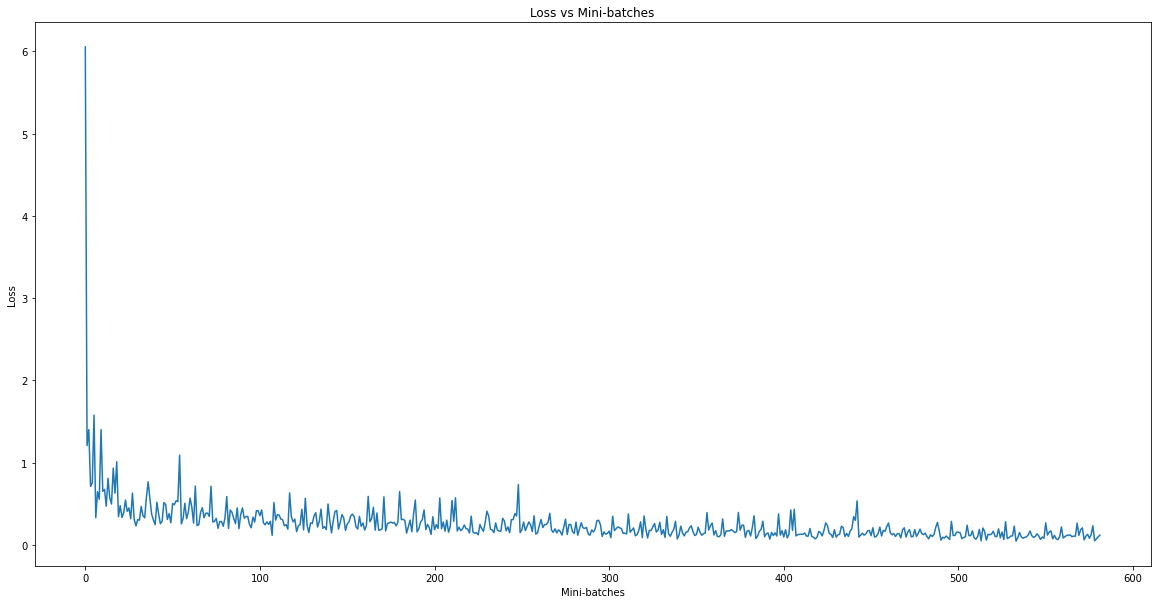

In [67]:
plt.figure(figsize=(20,10))

plt.plot(list(range(len(loss_list))), loss_list)

plt.title("Loss vs Mini-batches")
plt.xlabel("Mini-batches")
plt.ylabel("Loss")

In [68]:
src_text = data[data["Language"] == 'fr']["Review"].tolist()[0:30]

model_fr.to("cpu")

translated = model_fr.generate(**tokenizer_fr.prepare_seq2seq_batch(src_text))
tgt_text = [tokenizer_fr.decode(t, skip_special_tokens=True) for t in translated]

In [69]:
src_text

["Positif: L'espace dans l'appartement. La situation géographique, proche des belles plages et du centre ville à pieds. Pleins de restaurants/ bars à proximité. La propreté de l'hotel est irréprochable et le personnel très gentil et efficace. On reviendra!.",
 'Positif: Super accueil, personnel très sympathique, très arrangeant, super position! Bref tout était parfait..',
 'Positif: La vue. Négatif: Le personnel et vraiment désagréable.',
 "Positif: Emplacement idéal près de tout. Confort et propreté de l'appartement. Cour intérieure très sympas. Négatif: Un petit peu juste pour 3 personnes, manque un petit coin repas.",
 'De. F',
 "Positif: L'emplacement est idéal, la chambre est spacieuse, les equipements de la kitchenette sont appropriés. Négatif: Nous entendons bien le bruit des voisins le soir lorsqu'ils sont sur le balcon malgré la porte fermée.",
 'Positif: Nous avions pris un appartement Très bien équipé lave vaisselle Machine à laver sèche linge Four micro onde Vaisselle neuve

In [70]:
tgt_text

['Positive: The space in the apartment. The location, close to the beautiful beaches and the city center on foot. Lots of restaurants / bars nearby. The cleanliness of the hotel is irreprochable and the staff very nice and efficient. We will come back!.',
 'Positive: Great welcome, very friendly staff, very accommodating, great position! In short everything was perfect..',
 'Positif: La vue. Négatif: Le personnel et vraiment désagréable.',
 "Positif: Emplacement idéal près de tout. Confort et propreté de l'appartement. Cour intérieur très sympas. Négatif: Un peu juste pour 3 personnes, manque un petit coin déjeuner.",
 'De. F',
 'Positive: The location is ideal, the room is spacious, the kitchenette facilities are adequate. Negative: We can hear the noise from neighbors in the evening when they are on the balcony despite the door closed.',
 'Positif: Nous avions pris un appartement Très bien équipé lave vaisselle Machine à laver sèche Linge Microwave Vaisselle neve Pour un séjour de 7 

In [77]:
ans_text = data[data["Language"] == 'fr']["Translation"].tolist()[0:30]
ans_text

['Positive: The space in the apartment. The geographical location, close to beautiful beaches and the city center on foot. Lots of restaurants / bars nearby. The cleanliness of the hotel is impeccable and the staff very nice and efficient. We will come back !.',
 'Positive: Great welcome, very friendly staff, very accommodating, great position! In short everything was perfect ..',
 'Positive: The view. Negative: The staff and really rude.',
 'Positive: Perfect location close to everything. Comfort and cleanliness of the apartment. Very nice interior courtyard. Negative: A little tight for 3 people, missing a small dining area.',
 'From. F',
 'Positive: The location is ideal, the room is spacious, the kitchenette facilities are adequate. Negative: We can hear the noise from neighbors in the evening when they are on the balcony despite the door closed.',
 'Positive: We had taken an apartment Very well equipped dishwasher Washing machine tumble dryer Microwave oven New crockery For a stay

In [78]:
combined_text = list(zip(src_text, tgt_text, ans_text))

In [79]:
combined_text

[("Positif: L'espace dans l'appartement. La situation géographique, proche des belles plages et du centre ville à pieds. Pleins de restaurants/ bars à proximité. La propreté de l'hotel est irréprochable et le personnel très gentil et efficace. On reviendra!.",
  'Positive: The space in the apartment. The location, close to the beautiful beaches and the city center on foot. Lots of restaurants / bars nearby. The cleanliness of the hotel is irreprochable and the staff very nice and efficient. We will come back!.',
  'Positive: The space in the apartment. The geographical location, close to beautiful beaches and the city center on foot. Lots of restaurants / bars nearby. The cleanliness of the hotel is impeccable and the staff very nice and efficient. We will come back !.'),
 ('Positif: Super accueil, personnel très sympathique, très arrangeant, super position! Bref tout était parfait..',
  'Positive: Great welcome, very friendly staff, very accommodating, great position! In short everyth

In [72]:
model_fr.save_pretrained('./finetuned_fr_en_model/')
tokenizer_fr.save_pretrained('./finetuned_fr_en_model/')

('./finetuned_fr_en_model/tokenizer_config.json',
 './finetuned_fr_en_model/special_tokens_map.json',
 PosixPath('finetuned_fr_en_model/source_spm'),
 PosixPath('finetuned_fr_en_model/target_spm'),
 PosixPath('finetuned_fr_en_model/vocab'),
 PosixPath('finetuned_fr_en_model/tokenizer_config_file'),
 './finetuned_fr_en_model/added_tokens.json')

In [73]:
from transformers import MarianMTModel, MarianTokenizer

t_model_fr = MarianMTModel.from_pretrained('./finetuned_fr_en_model/')
t_tokenizer_fr = MarianTokenizer.from_pretrained('./finetuned_fr_en_model/')